In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

# Load dataset
df = pd.read_csv('/kaggle/input/zomato-restaurant-dataset/enhanced_zomato_dataset_clean.csv')

# Normalize strings
df['City'] = df['City'].astype(str).str.strip().str.lower()
df['Cuisine'] = df['Cuisine'].astype(str).str.strip().str.lower()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


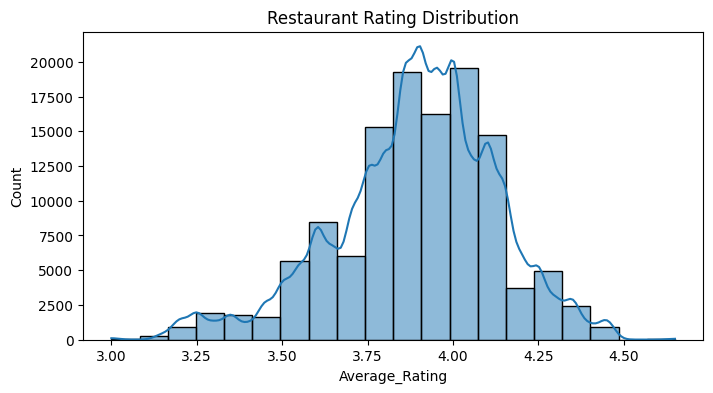

In [2]:
# Top cities
top_cities = df['City'].value_counts().head(10)

# Cuisine popularity
top_cuisines = df['Cuisine'].value_counts().head(10)

# Rating distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Average_Rating'], kde=True, bins=20)
plt.title("Restaurant Rating Distribution")
plt.savefig("/kaggle/working/plot_rating_distribution.png")


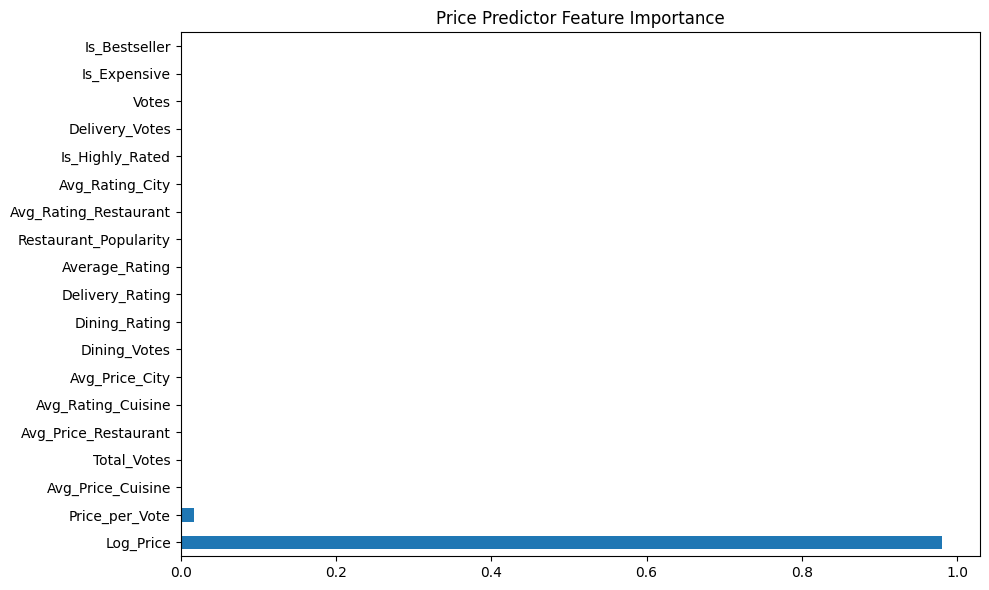

In [3]:
# Load models
price_model = joblib.load('/kaggle/input/zomato_price_prediction/other/default/1/price_predictor_rf.pkl')
success_model = joblib.load('/kaggle/input/zomato_price_prediction/other/default/1/success_classifier_rf.pkl')

# Feature importances
price_features = ['Dining_Rating', 'Delivery_Rating', 'Dining_Votes', 'Delivery_Votes', 'Votes', 'Average_Rating', 'Total_Votes',
                  'Price_per_Vote', 'Log_Price', 'Is_Bestseller', 'Restaurant_Popularity', 'Avg_Rating_Restaurant',
                  'Avg_Price_Restaurant', 'Avg_Rating_Cuisine', 'Avg_Price_Cuisine', 'Avg_Rating_City', 'Avg_Price_City',
                  'Is_Highly_Rated', 'Is_Expensive']

importances = pd.Series(price_model.feature_importances_, index=price_features).sort_values(ascending=False)
importances.plot(kind='barh', figsize=(10, 6), title="Price Predictor Feature Importance")
plt.tight_layout()
plt.savefig("/kaggle/working/plot_price_feature_importance.png")


In [4]:
# If not already done in previous notebooks
joblib.dump(price_model, '/kaggle/working/price_predictor_rf.pkl')
joblib.dump(success_model, '/kaggle/working/success_classifier_rf.pkl')


['/kaggle/working/success_classifier_rf.pkl']

In [5]:
# Compressed versions
df.to_csv('/kaggle/working/zomato_clean_processed.csv', index=False)

# Grouped for recommendation
restaurant_profiles = df.groupby(['Restaurant_Name', 'City', 'Cuisine']).agg({
    'Average_Rating': 'mean',
    'Prices': 'mean',
    'Restaurant_Popularity': 'mean'
}).reset_index()

restaurant_profiles.to_csv('/kaggle/working/restaurant_profiles.csv', index=False)


summary_text = """
## 🧾 ZomatoX Project Summary

This project analyzes 123,000+ restaurants across Indian cities using advanced trend analysis and ML models.

### 🔍 Modules:
- **Trend Dashboard:** Cuisine, rating, price evolution across cities
- **Price Predictor:** Predicts menu item price using 18+ engineered features
- **Restaurant Success Classifier:** ML-based model to flag potentially successful restaurants
- **Recommender System:** Suggests restaurants by cuisine, city, value, or rating

### 📁 Files Saved:
- price_predictor_rf.pkl
- success_classifier_rf.pkl
- restaurant_profiles.csv
- visuals (*.png)
"""

with open("/kaggle/working/summary_report.md", "w") as f:
    f.write(summary_text)
